In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

import pandas as pd

In [2]:
flowers = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    cache_dir='.',
    untar=True)

228827136/228813984 [==============================] - 1s 0us/step


In [24]:
flowers

'./datasets/flower_photos'

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_dir = '/content/datasets/flower_photos'
#NOTE: train_dir subdirectory is the y label
train_data = train_datagen.flow_from_directory(train_dir,
              batch_size=32, # number of images to process at a time 
              target_size=(224, 224), # convert all images to be 224 x 224
              class_mode="categorical", # type of problem we're working on
              subset='training',
              seed=42)

test_data = train_datagen.flow_from_directory(train_dir,
              batch_size=32, # number of images to process at a time 
              target_size=(224, 224), # convert all images to be 224 x 224
              class_mode="categorical", # type of problem we're working on
              subset='validation',
              seed=42)

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [26]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
          kernel_size=3, # can also be (3, 3)
          activation="relu", 
          input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                       padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu'
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(5, activation="softmax") # binary activation output
])

In [27]:
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [29]:
history = model_1.fit(train_data, validation_data=test_data, epochs=5)

Epoch 1/5
92/92 [==============================] - 13s 143ms/step - loss: 1.1597 - accuracy: 0.5148 - val_loss: 1.2096 - val_accuracy: 0.4911
Epoch 2/5
92/92 [==============================] - 13s 139ms/step - loss: 0.9913 - accuracy: 0.6240 - val_loss: 1.2507 - val_accuracy: 0.5445
Epoch 3/5
92/92 [==============================] - 13s 138ms/step - loss: 0.7849 - accuracy: 0.7064 - val_loss: 1.2078 - val_accuracy: 0.5239
Epoch 4/5
92/92 [==============================] - 13s 138ms/step - loss: 0.5517 - accuracy: 0.8067 - val_loss: 1.3326 - val_accuracy: 0.5226
Epoch 5/5
92/92 [==============================] - 13s 144ms/step - loss: 0.3452 - accuracy: 0.8928 - val_loss: 1.7224 - val_accuracy: 0.5185


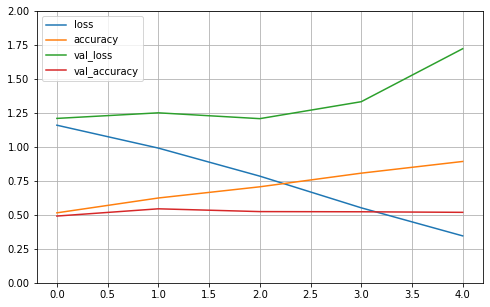

In [31]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1]
plt.show()

New model with augmented data

In [65]:
train_datagen_aug = ImageDataGenerator(rescale=1./255, validation_split=0.2,
                    rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                    shear_range=0.2, # shear the image
                    zoom_range=0.2, # zoom into the image
                    width_shift_range=0.2, # shift the image width ways
                    height_shift_range=0.2, # shift the image height ways
                    horizontal_flip=True)
train_dir = '/content/datasets/flower_photos'
#NOTE: train_dir subdirectory is the y label
train_data = train_datagen_aug.flow_from_directory(train_dir,
              batch_size=32, # number of images to process at a time 
              target_size=(224, 224), # convert all images to be 224 x 224
              class_mode="categorical", # type of problem we're working on
              subset='training',
              seed=42)

test_data = train_datagen_aug.flow_from_directory(train_dir,
              batch_size=32, # number of images to process at a time 
              target_size=(224, 224), # convert all images to be 224 x 224
              class_mode="categorical", # type of problem we're working on
              subset='validation',
              seed=42)

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [66]:
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
          kernel_size=3, # can also be (3, 3)
          activation="relu", 
          input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                       padding="valid"), # padding can also be 'same'
  tf.keras.layers.Dropout(.2),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu'
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(5, activation="softmax") # binary activation output
])

In [67]:
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [68]:
history_2 = model_2.fit(train_data, validation_data=test_data, epochs=10)

Epoch 1/10
92/92 [==============================] - 48s 513ms/step - loss: 1.5489 - accuracy: 0.3038 - val_loss: 1.4563 - val_accuracy: 0.3420
Epoch 2/10
92/92 [==============================] - 45s 491ms/step - loss: 1.3953 - accuracy: 0.3790 - val_loss: 1.3101 - val_accuracy: 0.4843
Epoch 3/10
92/92 [==============================] - 46s 498ms/step - loss: 1.2119 - accuracy: 0.4876 - val_loss: 1.2292 - val_accuracy: 0.4925
Epoch 4/10
92/92 [==============================] - 45s 488ms/step - loss: 1.1501 - accuracy: 0.5179 - val_loss: 1.2095 - val_accuracy: 0.5185
Epoch 5/10
92/92 [==============================] - 46s 500ms/step - loss: 1.0945 - accuracy: 0.5675 - val_loss: 1.1376 - val_accuracy: 0.5540
Epoch 6/10
92/92 [==============================] - 46s 501ms/step - loss: 1.0442 - accuracy: 0.5849 - val_loss: 1.1171 - val_accuracy: 0.5554
Epoch 7/10
92/92 [==============================] - 45s 489ms/step - loss: 1.0285 - accuracy: 0.5954 - val_loss: 1.0843 - val_accuracy: 0.5992

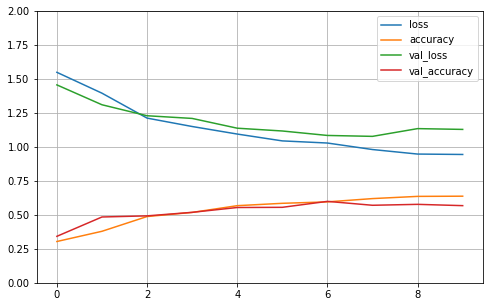

In [69]:
pd.DataFrame(history_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1]
plt.show()

Transfer Learning

In [39]:
# Download the pretrained model and save it as a Keras layer
import tensorflow_hub as hub

model_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/classification/1'
IMAGE_SHAPE = (224,224)

feature_extractor_layer = hub.KerasLayer(model_url,
         trainable=False, # freeze the underlying patterns
         name='feature_extraction_layer',
         input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

In [42]:
model_3 = tf.keras.Sequential([
   feature_extractor_layer, # use the feature extraction layer as base
   tf.keras.layers.Dense(5, activation='softmax', name='output_layer') # create our own output layer      
	])

In [43]:
model_3.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [44]:
history_3 = model_3.fit(train_data, validation_data=test_data, epochs=10)

Epoch 1/10
92/92 [==============================] - 58s 542ms/step - loss: 1.5944 - accuracy: 0.3215 - val_loss: 1.5756 - val_accuracy: 0.3653
Epoch 2/10
92/92 [==============================] - 46s 505ms/step - loss: 1.5595 - accuracy: 0.4570 - val_loss: 1.5416 - val_accuracy: 0.4925
Epoch 3/10
92/92 [==============================] - 47s 510ms/step - loss: 1.5280 - accuracy: 0.4849 - val_loss: 1.5107 - val_accuracy: 0.5048
Epoch 4/10
92/92 [==============================] - 47s 510ms/step - loss: 1.4991 - accuracy: 0.5134 - val_loss: 1.4842 - val_accuracy: 0.5089
Epoch 5/10
92/92 [==============================] - 46s 499ms/step - loss: 1.4724 - accuracy: 0.5131 - val_loss: 1.4584 - val_accuracy: 0.5089
Epoch 6/10
92/92 [==============================] - 47s 511ms/step - loss: 1.4439 - accuracy: 0.5400 - val_loss: 1.4283 - val_accuracy: 0.5280
Epoch 7/10
92/92 [==============================] - 48s 518ms/step - loss: 1.4204 - accuracy: 0.5362 - val_loss: 1.4102 - val_accuracy: 0.5349

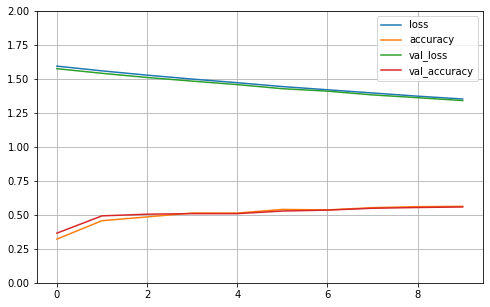

In [46]:
pd.DataFrame(history_3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1]
plt.show()

use transfer learning but fine tune last 3 layers

In [56]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=IMAGE_SHAPE+(3,),
    pooling=None
)
base_model.trainable = True

16719872/16705208 [==============================] - 0s 0us/step


In [57]:
# Refreeze every layer except for the last 3
for layer in base_model.layers[:-3]:
  layer.trainable = False

In [61]:
model_4 = tf.keras.Sequential([
   base_model, # use the feature extraction layer as base
   tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer"),
   tf.keras.layers.Dense(5, activation='softmax', name='output_layer') # create our own output layer      
	])

In [62]:
model_4.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [63]:
history_4 = model_4.fit(train_data, validation_data=test_data, epochs=10)

Epoch 1/10
92/92 [==============================] - 54s 528ms/step - loss: 1.6404 - accuracy: 0.2286 - val_loss: 1.6054 - val_accuracy: 0.2175
Epoch 2/10
92/92 [==============================] - 48s 528ms/step - loss: 1.6252 - accuracy: 0.2259 - val_loss: 1.6022 - val_accuracy: 0.2462
Epoch 3/10
92/92 [==============================] - 46s 502ms/step - loss: 1.6146 - accuracy: 0.2324 - val_loss: 1.6034 - val_accuracy: 0.2627
Epoch 4/10
92/92 [==============================] - 48s 522ms/step - loss: 1.6116 - accuracy: 0.2351 - val_loss: 1.6234 - val_accuracy: 0.2189
Epoch 5/10
92/92 [==============================] - 47s 516ms/step - loss: 1.6158 - accuracy: 0.2351 - val_loss: 1.6072 - val_accuracy: 0.2449
Epoch 6/10
92/92 [==============================] - 47s 512ms/step - loss: 1.6142 - accuracy: 0.2314 - val_loss: 1.6164 - val_accuracy: 0.2449
Epoch 7/10
92/92 [==============================] - 47s 516ms/step - loss: 1.6073 - accuracy: 0.2429 - val_loss: 1.6062 - val_accuracy: 0.2449

In [64]:
history_4 = model_4.fit(train_data, validation_data=test_data, epochs=10)

Epoch 1/10
92/92 [==============================] - 48s 520ms/step - loss: 1.6106 - accuracy: 0.2368 - val_loss: 1.6080 - val_accuracy: 0.2449
Epoch 2/10
35/92 [==========>...................] - ETA: 24s - loss: 1.6063 - accuracy: 0.2357

KeyboardInterrupt: ignored

In [ ]:
pd.DataFrame(history_4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1]
plt.show()